<a href="https://colab.research.google.com/github/ashisaxena710/Netflix_Movies_and_TV_Shows_Clustering/blob/main/Ashi_Individual_Colab_Netflix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows Clustering

# **Problem Statement**


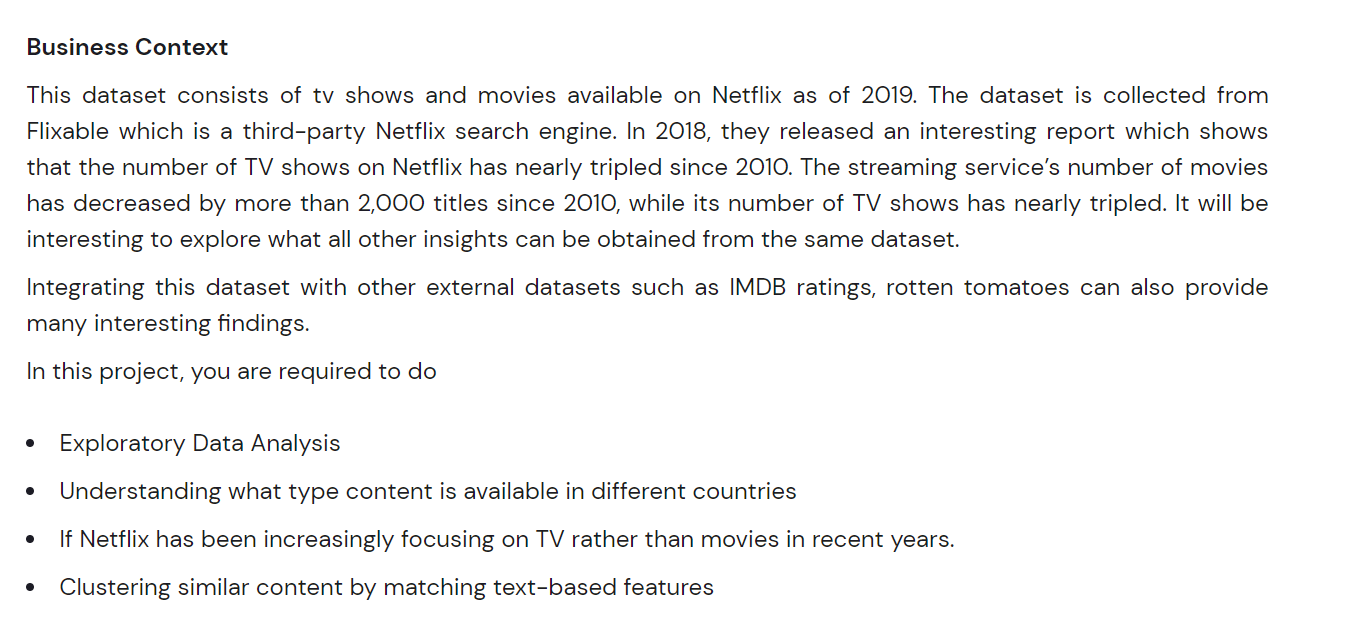

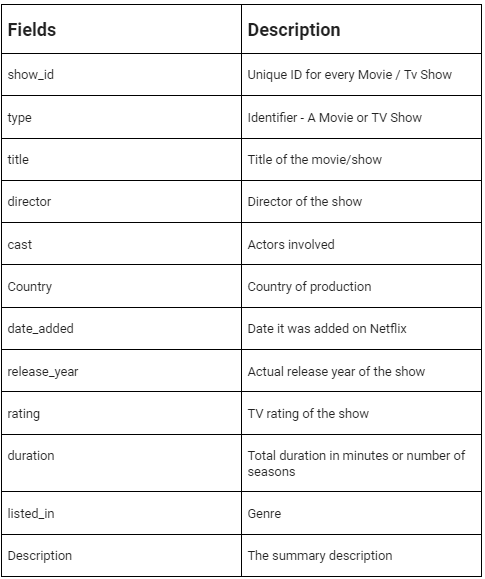

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

from wordcloud import WordCloud, STOPWORDS


import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Dataset Loading

In [ ]:
# Load Dataset
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Alma Better/Capstone Project 4/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv")

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f"The Netflix Movies and TV Shows Clustering dataset contain {df.shape[0]} rows and {df.shape[1]} columns. ")

The Netflix Movies and TV Shows Clustering dataset contain 7787 rows and 12 columns. 


### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

Great, we have no duplicate observations.

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

There exist numerous null values in director, cast, and country column which require attention and resolution. There are few null values in date_added and rating columns.

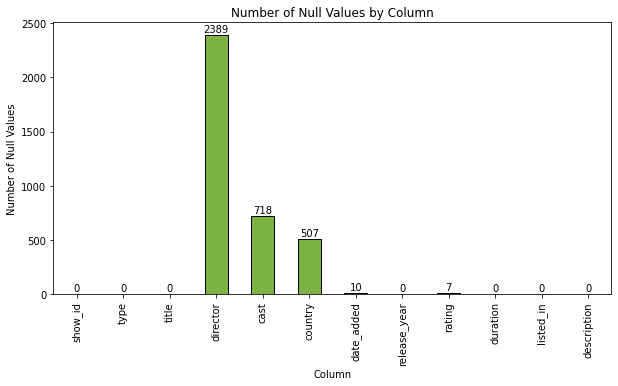

In [ ]:
# Visualizing the missing values
# calculate the number of null values in each column
null_counts = df.isnull().sum()

plt.figure(figsize=(10,5))

# create a bar chart of the null counts
ax = null_counts.plot(kind='bar',color='#7cb342',edgecolor='black')

# set the title and axis labels
plt.title('Number of Null Values by Column')
plt.xlabel('Column')
plt.ylabel('Number of Null Values')

# add labels to the bars
for i, v in enumerate(null_counts):
    ax.text(i, v + 30, str(v), color='black', ha='center')

# display the plot
plt.show()

### What did you know about your dataset?

The Netflix Movies and TV Shows Clustering Dataset consists of 12 columns, out of which only one column has an integer data type. The dataset does not contain any duplicate values. However, there are null values present in five columns: director, cast, country, date_added, and rating.

This dataset can be useful for exploring trends in the types of movies and TV shows that are available on Netflix, as well as for developing clustering models to group similar titles together based on shared attributes such as genre, country of origin, and rating.





## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### Variables Description 

The variable description of the Netflix Movies and TV Shows Clustering Dataset is as follows:

1. **show_id**: Unique identifier for each movie/show.

2. **type**: Indicates whether the entry is a movie or a TV show.
3. **title**: Name of the movie or TV show.
4. **director**: Name of the director(s) of the movie or TV show.
5. **cast**: Names of the actors and actresses featured in the movie or TV show.
6. **country**: Country or countries where the movie or TV show was produced.
7. **date_added**: Date when the movie or TV show was added to Netflix.
8. **release_year**: Year when the movie or TV show was released.
9. **rating**: TV rating or movie rating of the movie or TV show.
10. **duration**: Length of the movie or TV show in minutes or seasons.
11. **listed_in**: Categories or genres of the movie or TV show.
12. **description**: Brief synopsis or summary of the movie or TV show.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
print("The unique values for each variables :")
for i in df.columns:
  print(f"\t{i}------{df[i].nunique()}")

The unique values for each variables :
	show_id------7787
	type------2
	title------7787
	director------4049
	cast------6831
	country------681
	date_added------1565
	release_year------73
	rating------14
	duration------216
	listed_in------492
	description------7769


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

###1. Removing unnecessary columns

 We can remove 'show_id' column as this is just a unique identifier for each movie / TV shows and may not be necesarry for clustering and other machine learning tasks.


In [ ]:
df.drop('show_id',axis=1,inplace=True)

###2. Handling Missing Values

In [ ]:
for i in df.columns:
  if df[i].isna().sum()>0:
    print(f"[{i}]'s null value count : {df[i].isna().sum()}")

[director]'s null value count : 2389
[cast]'s null value count : 718
[country]'s null value count : 507
[date_added]'s null value count : 10
[rating]'s null value count : 7




*   Null values in director and cast column can replaced by 'Unknown'.
*   Null values in country, date_added and rating columns can be replaced by mode value of repective columns.



In [ ]:
# Handling missing values
df[['director','cast']]=df[['director','cast']].fillna("Unknown")
df['country']=df['country'].fillna(df['country'].mode()[0])

# Dropping remaining null values of date_added and rating
df.dropna(axis=0, inplace=True)

# df['date_added']=df['date_added'].fillna(df['date_added'].mode()[0])
# df['rating']=df['rating'].fillna(df['rating'].mode()[0])

###3.  Handling nested columns i.e 'director', 'cast', 'listed_in' and 'country'

In [ ]:
# Unnesting 'Directors' column
dir_constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist()
df1 = pd.DataFrame(dir_constraint, index = df['title']) 
df1 = df1.stack()
df1 = pd.DataFrame(df1.reset_index())
df1.rename(columns={0:'Directors'},inplace=True)
df1 = df1.drop(['level_1'],axis=1)
df1.sample(10)

,title,Directors
2142,Elliot the Littlest Reindeer,Jennifer Westcott
8453,Yuva,Mani Ratnam
3310,Isa Pa with Feelings,Prime Cruz
1949,Don Quixote: The Ingenious Gentleman of La Mancha,Jon YonKondy
6716,The Business of Drugs,Unknown
3157,I Hear You,Unknown
1501,City in the Sky,Unknown
4616,Mukhsin,Yasmin Ahmad
5725,Rugrats in Paris: The Movie,Stig Bergqvist
8228,What If?,Unknown


In [ ]:
# Unnesting 'cast' column
cast_constraint=df['cast'].apply(lambda x: str(x).split(', ')).tolist()
df2 = pd.DataFrame(cast_constraint, index = df['title']) 
df2 = df2.stack()
df2 = pd.DataFrame(df2.reset_index())
df2.rename(columns={0:'Actors'},inplace=True)
df2 = df2.drop(['level_1'],axis=1)
df2.sample(10)

,title,Actors
17821,Go! Live Your Way,Laura Azcurra
10306,Cirque du Freak: The Vampire's Assistant,Ken Watanabe
25207,La Rosa de Guadalupe,Sandra Itzel
30510,Movie 43,Richard Gere
35417,Power Rangers Turbo,Patricia Ja Lee
1245,A Christmas Catch,Genelle Williams
6566,Beyond Stranger Things,David Harbour
8574,Burning Sands,Davyon St. Usaire
53146,Uncertain Glory,Bruna Cusí
2944,Alien Warfare,Larissa Andrade


In [ ]:
# Unnesting 'listed_in' column
listed_constraint=df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df3 = pd.DataFrame(listed_constraint, index = df['title']) 
df3 = df3.stack()
df3 = pd.DataFrame(df3.reset_index())
df3.rename(columns={0:'Genre'},inplace=True)
df3 = df3.drop(['level_1'],axis=1)
df3.sample(10)

,title,Genre
10055,Oh! Baby (Tamil),International Movies
12645,Star Trek,TV Action & Adventure
15355,The World We Make,Dramas
15759,Tremors 3: Back to Perfection,Horror Movies
9878,Norm Macdonald Has a Show,Stand-Up Comedy & Talk Shows
1392,Await Further Instructions,Horror Movies
7006,JoJo's Bizarre Adventure,Anime Series
4687,Fear Files... Har Mod Pe Darr,TV Horror
7051,Judd Apatow: The Return,Stand-Up Comedy
13111,Team Kaylie,Kids' TV


In [ ]:
# Unnesting 'country' column
country_constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist()
df4 = pd.DataFrame(country_constraint, index = df['title']) 
df4 = df4.stack()
df4 = pd.DataFrame(df4.reset_index())
df4.rename(columns={0:'Country'},inplace=True)
df4 = df4.drop(['level_1'],axis=1)
df4.sample(10)

,title,Country
2543,F.R.E.D.I.,United States
1890,Cuddle Weather,Philippines
907,Barbie: Video Game Hero,United States
3528,I Am Not Okay With This,United States
897,Barbie Life in the Dreamhouse,United States
5793,Pek Yakında,Turkey
273,A Sort of Family,France
3580,Ideachi Kalpana,India
6665,Shaka Zulu,United States
5691,Paathi,India


Great, we have sucessfully separated the nested columns. Now let's just merge all the created dataframe into the single merged dataframe.

In [ ]:
## Merging all the unnested dataframes
# Merging director and cast
df5 = df2.merge(df1,on=['title'],how='inner')

# Merging listed_in with merged of (director and cast)
df6 = df5.merge(df3,on=['title'],how='inner')

# Merging country with merged of [listed_in with merged of (director and cast)]
df7 = df6.merge(df4,on=['title'],how='inner')

# Head of final merged dataframe
df7.head()

,title,Actors,Directors,Genre,Country
0,3%,João Miguel,Unknown,International TV Shows,Brazil
1,3%,João Miguel,Unknown,TV Dramas,Brazil
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil


Cool, now let's merge this dataframe with the original one on the left join to avoid information loss.

In [ ]:
# Merging unnested data with the created dataframe in order to make the final dataframe
df = df7.merge(df[['type', 'title', 'date_added', 'release_year', 'rating', 'duration','description']],on=['title'],how='left')
df.head()

,title,Actors,Directors,Genre,Country,type,date_added,release_year,rating,duration,description
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,"August 14, 2020",2020,TV-MA,4 Seasons,In a future where the elite inhabit an island ...


###4. Changing Data Types

In [ ]:
# Typecasting duration into integer
df['duration']= df['duration'].apply(lambda x: int(x.split()[0]))

# Typecasting string object to datetime object of date_added column
df['date_added']= pd.to_datetime(df['date_added'])

# Extracting date, day, month and year from date_added column
df["day_added"]= df["date_added"].dt.day
df["month_added"]= df["date_added"].dt.month
df["year_added"]= df["date_added"].dt.year

# Dropping date_added
df.drop('date_added', axis=1, inplace=True)

### Minimizing the categories in 'rating' column

*Rating column has the following categories* :

**TV-MA**: For Mature Audiences. This rating is intended for adults and may contain explicit content, graphic violence, or strong sexual content.

**TV-14**: For Ages 14 and Up. This rating may contain intense violence, suggestive dialogue, or coarse language.

**TV-PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**R**: Restricted. This rating indicates that the content is not suitable for children under 17 and may contain adult themes, strong language, and violence.

**PG-13**: Parental Guidance Suggested for Children Under 13. This rating may contain intense violence, sexual content, or strong language.

**TV-Y**: For All Children. This rating is intended for very young children and contains only mild, child-friendly content.

**TV-Y7**: For Ages 7 and Up. This rating may contain mild fantasy violence or some suggestive content.

**PG**: Parental Guidance Suggested. This rating suggests that parents may want to watch with younger children due to mild violence or suggestive content.

**TV-G**: For General Audiences. This rating indicates that the content is suitable for all ages.

**NR**: Not Rated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**G**: General Audiences. This rating indicates that the content is suitable for all ages.

**TV-Y7-FV**: For Ages 7 and Up with Fantasy Violence. This rating may contain mild fantasy violence or some suggestive content.

**UR**: Unrated. This rating is given to content that has not been rated by the MPAA or the TV rating system.

**NC-17**: No One 17 and Under Admitted. This rating indicates that the content is not suitable for children under 17 and may contain explicit content, graphic violence, or strong sexual content.




We can see that in rating columns there are many categories and there are categories which resemble one another. So we will create 5 categories of rating as follows :

1. Mature Content : 'TV-MA' , 'R' , 'NC-17'

2. Teen and Adult Content : 'TV-14' , 'PG-13' 

3. Family-Friendly Content : 'TV-PG' , 'PG' , 'TV-G' , 'G'

4. Children's Content : 'TV-Y' , 'TV-Y7' , 'TV-Y7-FV'

5. Unrated or Not Applicable : 'NR' , 'UR'

In [ ]:
# Binning the values in the rating column
rating_map = {'TV-MA':'Adult Content',
              'R':'Adult Content',
              'PG-13':'Teen Content',
              'TV-14':'Teen Content',
              'TV-PG':'Children Content',
              'NR':'Not Rated',
              'TV-G':'Children Content',
              'TV-Y':'Family-friendly Content',
              'TV-Y7':'Family-friendly Content',
              'PG':'Children Content',
              'G':'Children Content',
              'NC-17':'Adult Content',
              'TV-Y7-FV':'Family-friendly Content',
              'UR':'Not Rated'}

df['rating'].replace(rating_map, inplace = True)

### What all manipulations have you done and insights you found?

We have performed several data manipulations, including:

1. Removing the show_id column as it did not provide any useful information for our analysis.

2. Handling the missing values in columns director, cast, country, date_added, and rating by either dropping the missing values or filling them with appropriate values.

3. Converting the release_year and date_added columns to the appropriate data type as they were initially stored as strings.

4. Minimizing the rating column to just five categories: 'Mature Content','Teen and Adult Content','Family-Friendly Content',"Children's Content" and 'Unrated or Not Applicable'.
  
Through these manipulations, we have improved the quality of the dataset and made it easier to perform meaningful analysis and draw insights from the dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

###Chart-1 ( Distribution of Content Types on Netflix )

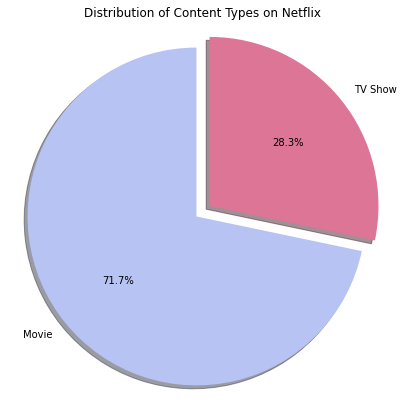

In [ ]:
# Create a DataFrame of the count of each unique value in the 'type' column
type_counts = df['type'].value_counts()
plt.figure(figsize=(7,7))
# Create a pie chart of the 'type' column
plt.pie(type_counts, labels=type_counts.index,colors=['#B7C3F3','#DD7596'],explode=(0, 0.1),shadow=True, autopct='%1.1f%%',startangle=90)
plt.title('Distribution of Content Types on Netflix')
plt.axis('equal')
plt.show()

We can see that the majority of the content on Netflix is movies, which account for around two-thirds of the total content. TV shows make up the remaining one-third of the content.

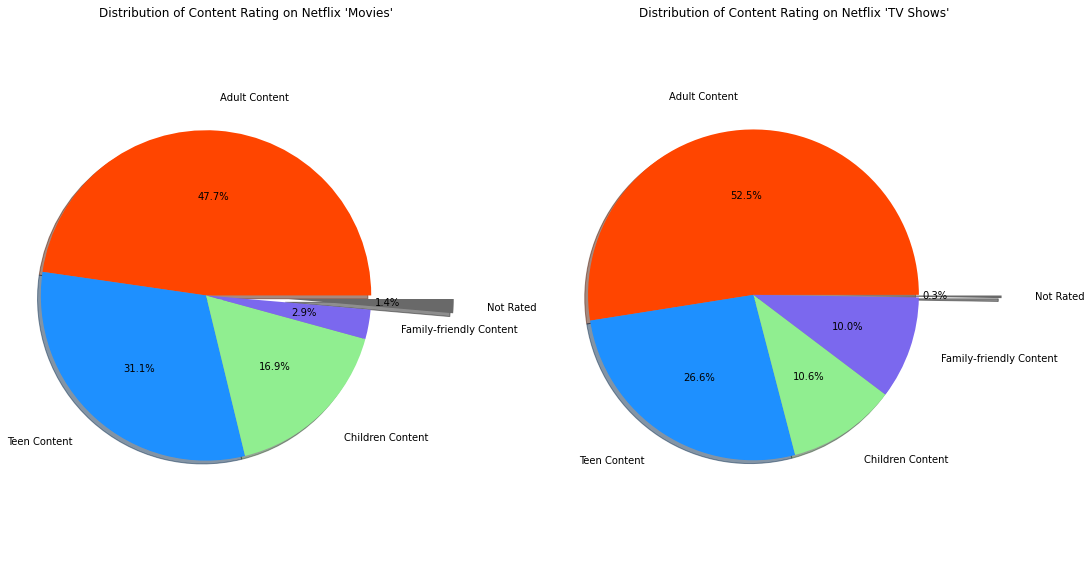

In [ ]:
Movies_df=df[df['type']=='Movie']
TV_shows_df=df[df['type']=='TV Show']

plt.figure(figsize=(18,10))
for i,j,k in ((Movies_df, 'Movies',0),(TV_shows_df, 'TV Shows',1)):
  plt.subplot(1,2,k+1)
  count= i['rating'].value_counts()
  plt.pie(count, labels=count.index,explode=(0,0,0,0,0.5),colors=['orangered','dodgerblue','lightgreen','mediumslateblue','dimgray'],shadow=True, autopct='%1.1f%%', labeldistance=1.2)
  plt.title(f"Distribution of Content Rating on Netflix '{j}'")
  plt.axis('equal')
plt.show()

###Chart-2 ( Top 10 directors of Movies and TV Shows on Netflix )

In [ ]:
# colors = ['#FFC107', '#03A9F4', '#4CAF50', '#E91E63', '#9C27B0', '#FF9800', '#795548', '#00BCD4', '#8BC34A', '#FF5722']

In [ ]:
df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020


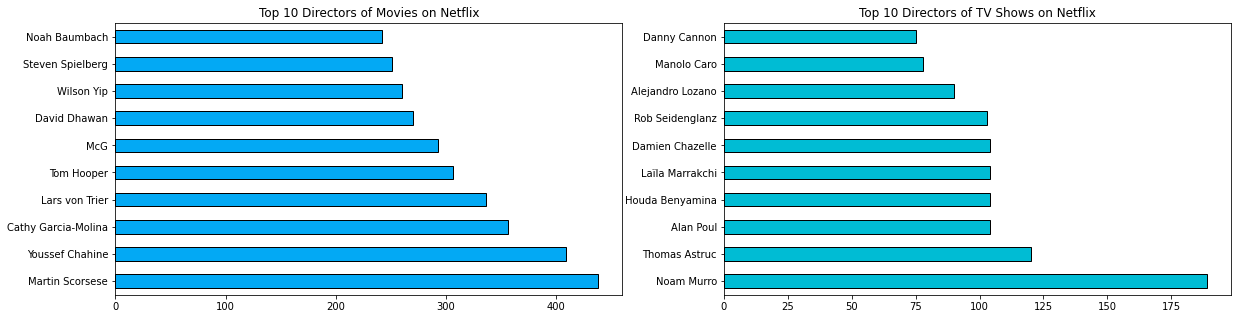

In [ ]:
Movies_df=df[df['type']=='Movie']
TV_shows_df=df[df['type']=='TV Show']

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))

# Plot the top 10 Directors for movies on Netflix
Movies_df[~(Movies_df['Directors']=='Unknown')].Directors.value_counts().nlargest(10).plot(kind='barh', color='#03A9F4', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 Directors of Movies on Netflix')

# Plot the top 10 Directors for TV shows on Netflix
TV_shows_df[~(TV_shows_df['Directors']=='Unknown')].Directors.value_counts().nlargest(10).plot(kind='barh', color='#00BCD4', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 Directors of TV Shows on Netflix')

# Display the chart
plt.show()

For movies, the most prolific director on Netflix is Martin Scorsese and for TV shows, the most prolific director on Netflix is Noam Murro.

Interestingly, there are no directors who appear on both charts, suggesting that the most successful directors on Netflix tend to specialize in either movies or TV shows.

###Chart-3 ( Top 10 casts of Movies and TV Shows on Netflix )

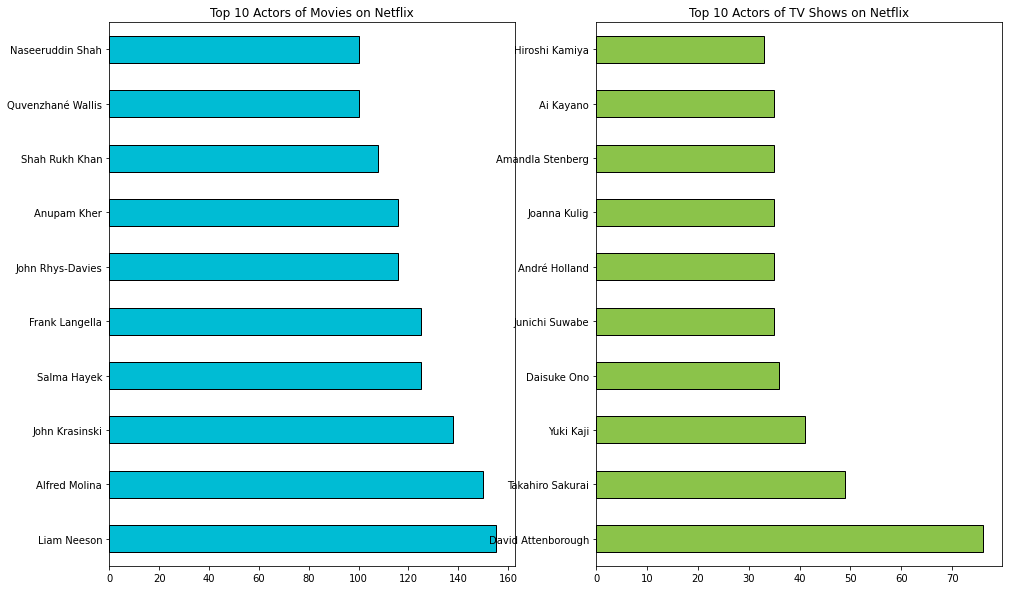

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,10))

# Plot the top 10 Actors for movies on Netflix
Movies_df[~(Movies_df['Actors']=='Unknown')].Actors.value_counts().nlargest(10).plot(kind='barh', color='#00BCD4', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 Actors of Movies on Netflix')

# Plot the top 10 Actors for TV shows on Netflix
TV_shows_df[~(TV_shows_df['Actors']=='Unknown')].Actors.value_counts().nlargest(10).plot(kind='barh', color='#8BC34A', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 Actors of TV Shows on Netflix')

# Display the chart
plt.show()

For movies, the most prolific actor on Netflix is Liam Neeson and for TV shows, the most prolific actor on Netflix is David Attenborough.


###Chart-4 ( Top 10 countries for Movies and TV Shows on Netflix )

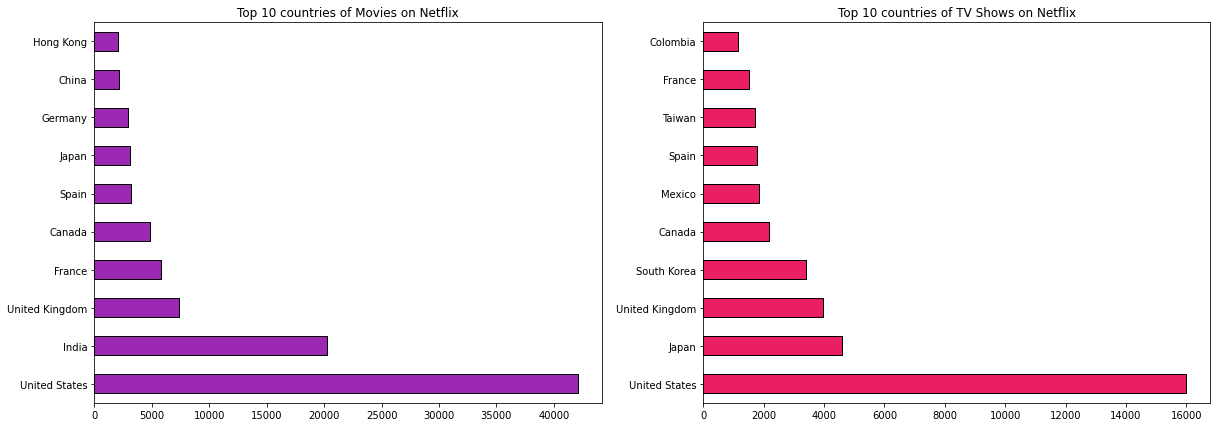

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

# Plot the top 10 countries for movies on Netflix
Movies_df[~(Movies_df['Country']=='Unknown')].Country.value_counts().nlargest(10).plot(kind='barh', color='#9C27B0', edgecolor='black', ax=ax1)
ax1.set_title('Top 10 countries of Movies on Netflix')

# Plot the top 10 countries for TV shows on Netflix
TV_shows_df[~(TV_shows_df['Country']=='Unknown')].Country.value_counts().nlargest(10).plot(kind='barh', color='#E91E63', edgecolor='black', ax=ax2)
ax2.set_title('Top 10 countries of TV Shows on Netflix')

# Display the chart
plt.show()

The United States is the top country producing both movies and TV shows on Netflix. This suggests that Netflix is heavily influenced by American content.

India is the second-highest producer of movies on Netflix, indicating the growing popularity of Bollywood movies worldwide.

The Japan is the second-highest producer of TV shows on Netflix, which suggests that British TV shows are in demand globally.

Other countries like Canada, South Korea, and United Kingdom also have a significant presence in the dataset, indicating the diversity of content available on Netflix.

###Chart-5 ( Number of Movies and TV Shows released on Netflix per year in the last 20 years )

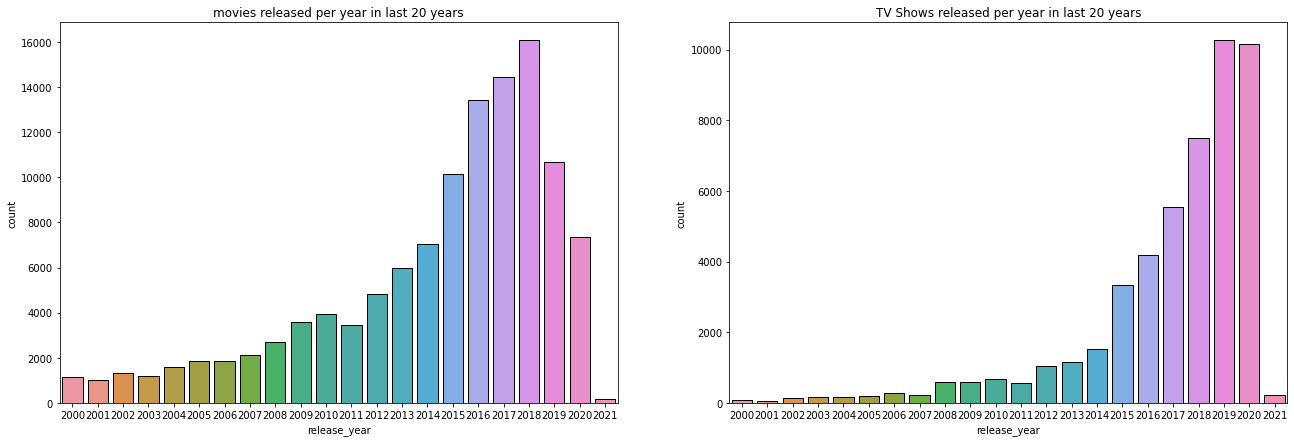

In [ ]:
# Create a figure with two subplots
# To display only years between 2000 and 2021
Movies_df = df[(df['type'] == 'Movie') & (df['release_year'] >= 2000) & (df['release_year'] <= 2021)]
TV_shows_df = df[(df['type'] == 'TV Show') & (df['release_year'] >= 2000) & (df['release_year'] <= 2021)]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(22, 7))

sns.countplot(x=Movies_df['release_year'],data=Movies_df,ax=ax1,edgecolor='black')
ax1.set_title('movies released per year in last 20 years')

sns.countplot(x=TV_shows_df['release_year'],data=TV_shows_df,ax=ax2,edgecolor='black')
ax2.set_title('TV Shows released per year in last 20 years')
# Display the chart
plt.show()


The number of movies released on Netflix peaked in 2017 and 2018 and has been decreasing since then. On the other hand, the number of TV shows released has steadily increased over the same time period.

This trend could be due to increasing competition in the streaming market, with more platforms entering the market and vying for content. Netflix may be shifting its focus towards producing more original content, including TV shows, which may be more popular among its subscribers.

###Chart-6 ( Number of Movies and TV Shows added on Netflix per month)

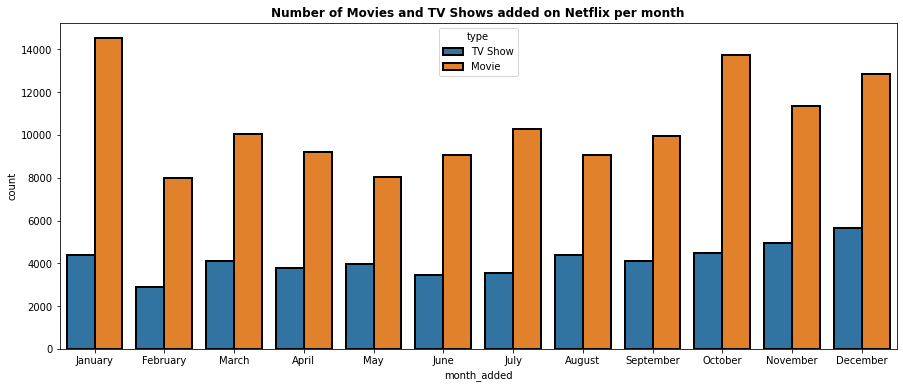

In [ ]:
import calendar

fig, ax = plt.subplots(figsize=(15,6))

sns.countplot(x='month_added', hue='type',lw=2, data=df, ax=ax,edgecolor='black')
ax.set_title("Number of Movies and TV Shows added on Netflix per month",fontweight="bold")

# Get the month names
month_names = [calendar.month_name[i] for i in range(1, 13)]

# Update the tick labels on the x-axis
ax.set_xticklabels(month_names)

plt.show()


The months of January, July, August, and December are the most popular months for adding new content to Netflix, with the highest number of movie and TV show releases.

The months of February, March, April, May, June, September, October, and November have a relatively similar number of new content releases, with February being the least popular month.

There are more movie releases than TV show releases in most months, except for January and February where TV show releases are slightly higher.

Overall, Netflix adds new content to its platform consistently throughout the year, with no significant spikes or dips in the number of releases each month.

###Chart-7 ( Number of Movies and TV Shows added on Netflix each year)

Text(0.5, 1.0, 'Number of Movies and TV Shows added on Netflix each year')

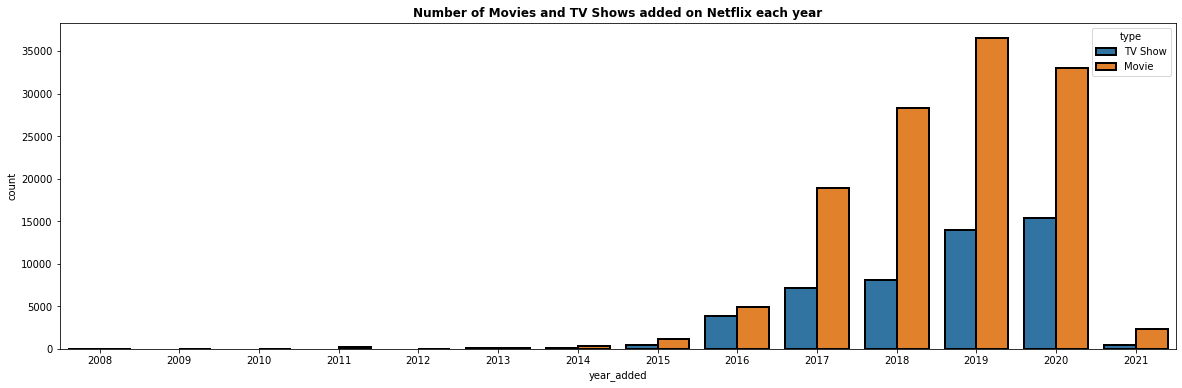

In [ ]:
fig, ax = plt.subplots(figsize=(20,6))

sns.countplot(x='year_added', hue='type',lw=2, data=df, ax=ax,edgecolor='black')
plt.title("Number of Movies and TV Shows added on Netflix each year",fontweight="bold")

From the plot, we can see that the number of movies on Netflix has been increasing steadily every year, with a significant rise in the number of movies added since 2015. On the other hand, the number of TV shows added has increased more rapidly than the movies. In the earlier years, the number of movies and TV shows added was almost the same, but since 2018, the number of TV shows added on Netflix has been significantly higher than movies.

Overall, the plot shows that Netflix has been consistently adding new content every year, and the trend seems to be continuing with a greater focus on TV shows in recent years.






###Chart-8 ( Duration for Movies and TV Shows)

In [ ]:
colors = ['#BC5090', '#FF6361', '#FFA600', '#2D728F', '#9970AB', '#009B77', '#D2386C', '#56B4E9', '#8C92AC', '#FFD662']


In [ ]:
df.head()

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020


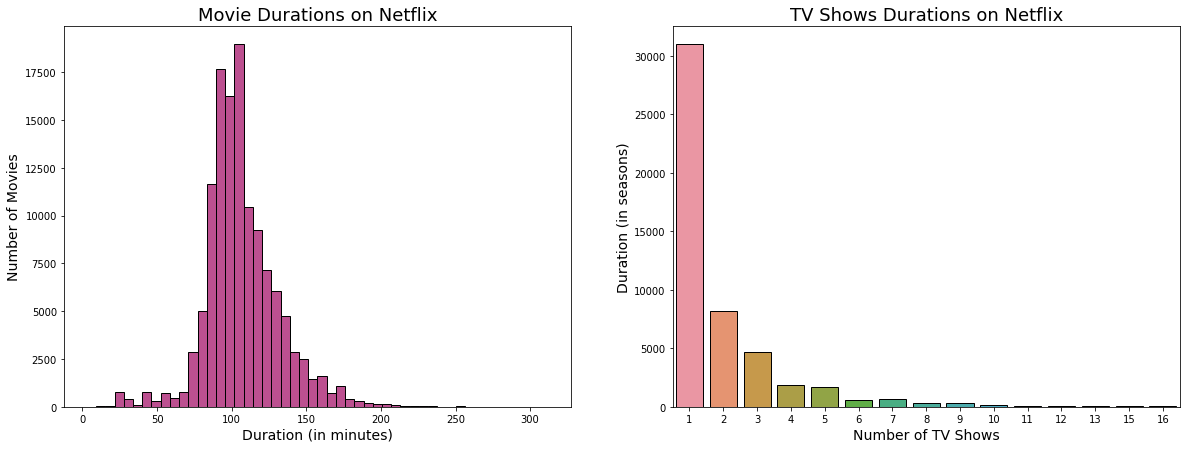

In [ ]:
Movies_df = df[df['type'] == 'Movie'].copy()  
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

ax1.hist(Movies_df.loc[:, 'duration'], bins=50, color='#BC5090', edgecolor='black')
ax1.set_title('Movie Durations on Netflix', fontsize=18)
ax1.set_xlabel('Duration (in minutes)', fontsize=14)
ax1.set_ylabel('Number of Movies', fontsize=14)

Shows_df=df[df["type"]=='TV Show']
sns.countplot(x='duration',data=Shows_df,ax=ax2,edgecolor='black')
plt.title('TV Shows Durations on Netflix', fontsize=18)
plt.ylabel('Duration (in seasons)', fontsize=14)
plt.xlabel('Number of TV Shows', fontsize=14)
plt.show()

The first subplot shows a histogram of the distribution of movie durations in minutes on Netflix. It can be seen that the majority of movies on Netflix have a duration between 80 to 120 minutes. The second subplot shows a countplot of the distribution of TV show durations in seasons on Netflix. It can be seen that the most common duration for TV shows on Netflix is one season, followed by two seasons.

###Chart-9 ( Top 10 genres for Movies and TV Shows on Netflix)

In [ ]:
df

,title,Actors,Directors,Genre,Country,type,release_year,rating,duration,description,day_added,month_added,year_added
0,3%,João Miguel,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
1,3%,João Miguel,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
2,3%,João Miguel,Unknown,TV Sci-Fi & Fantasy,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
3,3%,Bianca Comparato,Unknown,International TV Shows,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
4,3%,Bianca Comparato,Unknown,TV Dramas,Brazil,TV Show,2020,Adult Content,4,In a future where the elite inhabit an island ...,14,8,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175802,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Unknown,Sam Dunn,Documentaries,Canada,Movie,2019,Adult Content,90,This documentary delves into the mystique behi...,1,3,2020
175803,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Unknown,Sam Dunn,Documentaries,United States,Movie,2019,Adult Content,90,This documentary delves into the mystique behi...,1,3,2020
175804,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Unknown,Sam Dunn,Music & Musicals,United Kingdom,Movie,2019,Adult Content,90,This documentary delves into the mystique behi...,1,3,2020
175805,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Unknown,Sam Dunn,Music & Musicals,Canada,Movie,2019,Adult Content,90,This documentary delves into the mystique behi...,1,3,2020


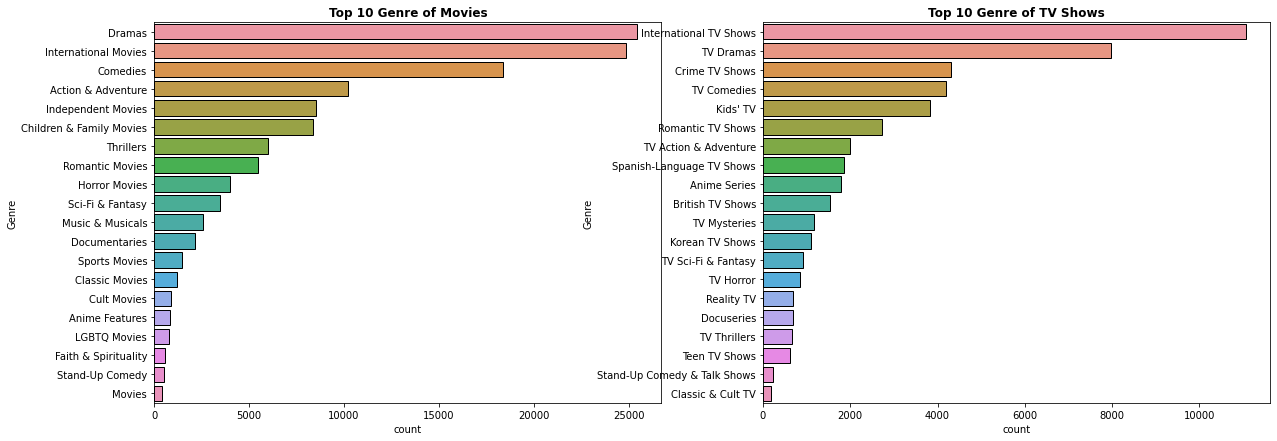

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))

sns.countplot(y=Movies_df['Genre'],data=Movies_df,order=Movies_df['Genre'].value_counts().index[0:20],ax=ax1,edgecolor='black')
ax1.set_title('Top 10 Genre of Movies',fontweight="bold")

sns.countplot(y=TV_shows_df['Genre'],data=TV_shows_df,order=TV_shows_df['Genre'].value_counts().index[0:20],ax=ax2,edgecolor='black')
ax2.set_title('Top 10 Genre of TV Shows',fontweight="bold")
# Display the chart
plt.show()

In [ ]:
df.shape

(175807, 13)

##Bivariate Analysis

###Chart-10 ( Countries having higher proportion of movies and Tv shows on netflix )

<BarContainer object of 11 artists>

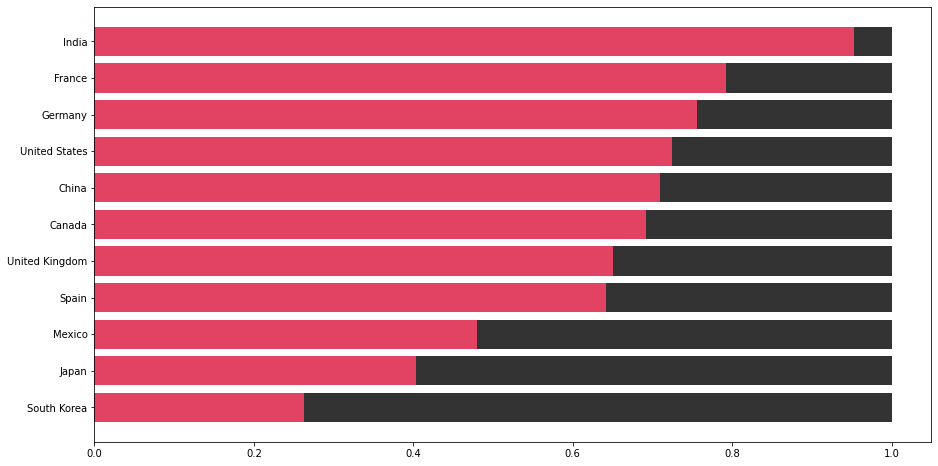

In [ ]:
# Plotting the Horizontal bar plot for top 10 country contains Movie & TV Show split
country_order = df['Country'].value_counts()[:11].index
content_data = df[['type', 'Country']].groupby('Country')['type'].value_counts().unstack().loc[country_order]
content_data['sum'] = content_data.sum(axis=1)
content_data_ratio = (content_data.T / content_data['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie',ascending=False)[::-1]

# Plotting the barh
fig, ax = plt.subplots(1,1,figsize=(15, 8),)

ax.barh(content_data_ratio.index, content_data_ratio['Movie'], 
        color='crimson', alpha=0.8, label='Movie')
ax.barh(content_data_ratio.index, content_data_ratio['TV Show'], left=content_data_ratio['Movie'], 
        color='black', alpha=0.8, label='TV Show')

This horizontal bar plot show the split of movies and TV shows among the top 10 countries with the most content on Netflix. The countries are ordered by the proportion of movies, with the highest proportion of movies at the top. 

 We can see that most countries ( especially  India ) have a higher proportion of movies, with the exception of Japan and South Korea, which have a higher proportion of TV shows.

###Chart-11 ( Top 15 countries with most contents on netflix)

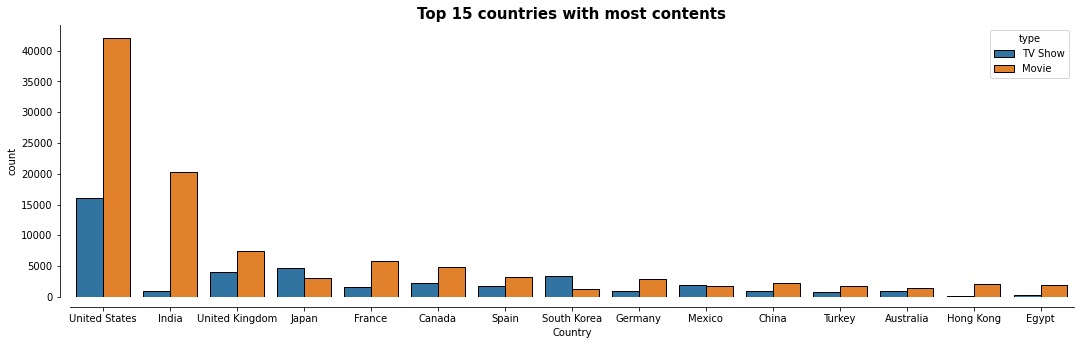

In [ ]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['Country'], order=df['Country'].value_counts().index[0:15], hue=df['type'], edgecolor='black')
plt.xticks(rotation=50)
plt.title('Top 15 countries with most contents', fontsize=15, fontweight='bold')

# Remove the top and right spines
sns.despine(offset={'left': 10, 'bottom': 10})

plt.show()


###Chart-11 (Netflix Originals)

Some movies and TV shows were actually released in the past and they were added 
later on Netflix.
But some movies and TV shows were released on Netflix itself. Named those as Netflix Originals.

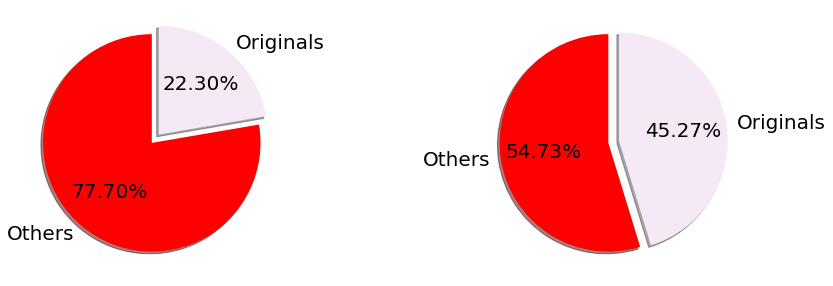

In [ ]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

Movies_df['originals'] = np.where(Movies_df['release_year'] == Movies_df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
ax1.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax1.pie(Movies_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

TV_shows_df['originals'] = np.where(TV_shows_df['release_year'] == TV_shows_df['year_added'], 'Yes', 'No')
# pie plot showing percentage of originals and others in movies
ax2.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax2.pie(TV_shows_df['originals'].value_counts(), explode=explode, autopct='%.2f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

plt.show()

Approximately 22% of the movies available on Netflix are originals while the remaining were released earlier by different modes. Also about 45% of the TV shows available on Netflix are originals while the other were released earlier by different modes.

###Chart-11 (Wordcloud for Description)

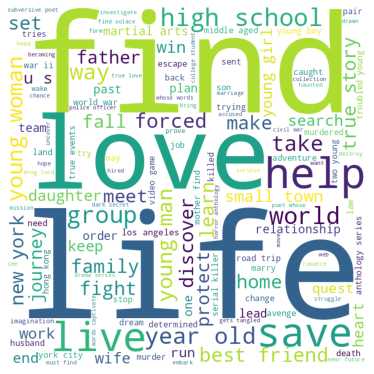

In [ ]:
# Building a wordcloud for the descriptions
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.description.values:
    
    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()
    
    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
    
    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 700, height = 700,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)


# plot the WordCloud image                      
plt.figure(figsize = (10,5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot 

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: There is no significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

**Alternative Hypothesis**: There is a significant difference in the proportion ratings of drama movies and comedy movies on Netflix.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
from statsmodels.stats.proportion import proportions_ztest

# Subset the data to only include drama and comedy movies
subset = df[df['Genre'].str.contains('Dramas') | df['Genre'].str.contains('Comedies')]

# Calculate the proportion of drama and comedy movies
drama_prop = len(subset[subset['Genre'].str.contains('Dramas')]) / len(subset)
comedy_prop = len(subset[subset['Genre'].str.contains('Comedies')]) / len(subset)

# Set up the parameters for the z-test
count = [int(drama_prop * len(subset)), int(comedy_prop * len(subset))]
nobs = [len(subset), len(subset)]
alternative = 'two-sided'

# Perform the z-test
z_stat, p_value = proportions_ztest(count=count, nobs=nobs, alternative=alternative)
print('z-statistic: ', z_stat)
print('p-value: ', p_value)

# Set the significance level
alpha = 0.05

# Print the results of the z-test
if p_value < alpha:
    print(f"Reject the null hypothesis.")
else:
    print(f"Fail to reject the null hypothesis.")


z-statistic:  64.8000705213286
p-value:  0.0
Reject the null hypothesis.


***Just For Explanation:***

To set up the parameters for the z-test, you will need to specify the following:

**count**: A list or array of the number of successes in each group, in the same order as the proportions.

**nobs**: A list or array of the number of observations in each group, in the same order as the proportions.

**value (optional)**: The null hypothesis value for the difference in proportions. The default value is 0.

**alternative (optional)**: The alternative hypothesis, which can be 'two-sided' (default), 'larger', or 'smaller'.


In this code, count and nobs are lists of the same length that contain the count and number of observations for each group. The alternative parameter is set to 'two-sided', which means that we are testing for a difference in proportions in either direction. The value parameter is not specified, so it defaults to 0, which represents the null hypothesis that there is no difference in proportions.

##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-value is the z-test for proportions.


##### Why did you choose the specific statistical test?

The z-test for proportions was chosen because we are comparing the proportions of two categorical variables (drama movies and comedy movies) in a sample. The null hypothesis and alternative hypothesis are about the difference in proportions, and we want to determine if the observed difference in proportions is statistically significant or not. The z-test for proportions is appropriate for this situation because it allows us to compare two proportions and calculate the probability of observing the difference we see in our sample if the null hypothesis were true.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.

**Alternative Hypothesis**: The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# To test this hypothesis, you perform a two-sample t-test.
from scipy.stats import ttest_ind

# Create separate dataframes for TV shows in 2020 and 2021
tv_2020 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2020)]
tv_2021 = df[(df['type'] == 'TV Show') & (df['release_year'] == 2021)]

# Calculate the mean duration for each dataframe
tv_2020_mean = tv_2020['duration'].mean()
tv_2021_mean = tv_2021['duration'].mean()

# Perform two-sample t-test
t, p = ttest_ind(tv_2020['duration'].astype(int), 
                 tv_2021['duration'].astype(int), equal_var=False)

# Print the results
if p < 0.05:
    print('Reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.')
else:
    print('Failed to reject null hypothesis. \nThe average duration of TV shows added in the year 2020 on Netflix is not significantly different from the average duration of TV shows added in the year 2021.')



Reject null hypothesis. 
The average duration of TV shows added in the year 2020 on Netflix is significantly different from the average duration of TV shows added in the year 2021.


**JUST FOR EXPLANATION**

**why we have used ttest_ind**

We have used ttest_ind because we are comparing the means of two independent samples (TV shows added in 2020 vs. TV shows added in 2021). ttest_ind performs a two-sample t-test assuming unequal variances, which is appropriate in this case since we cannot assume that the variances of the two populations are equal.



**what are the parameters for ttest_ind**

The ttest_ind function in SciPy performs a two-sample t-test with independent samples. Its parameters are:

**a**: 1-D array-like, the first sample

**b**: 1-D array-like, the second sample

**equal_var**: bool, whether or not to assume equal variances of the two samples. If True, a standard independent 2 sample test is performed that assumes equal population variances. If False, Welch’s t-test is performed, which does not assume equal population variance. The default is True.

**nan_policy**: {'propagate', 'raise', 'omit'}, defines how to handle when input contains NaN. The default is 'propagate'.

The function returns the t-statistic and p-value for the two-sided t-test.




##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the P-Value is a two-sample t-test.


##### Why did you choose the specific statistical test?

The two-sample t-test was chosen because we are comparing the means of two different samples (TV shows added in 2020 vs TV shows added in 2021) to determine whether they are significantly different. Additionally, we assume that the two samples have unequal variances since it is unlikely that the duration of TV shows added in 2020 and 2021 would have the exact same variance.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

**Null Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.

**Alternative Hypothesis**: The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.           

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats

# Calculate the proportion of TV shows produced in the United States
tv_proportion = np.sum(TV_shows_df['Country'].str.contains('United States')) / len(TV_shows_df)

# Calculate the proportion of movies produced in the United States
movie_proportion = np.sum(Movies_df['Country'].str.contains('United States')) / len(Movies_df)

# Perform two-sample proportion test
n1, n2 = len(TV_shows_df), len(Movies_df)
p1, p2 = tv_proportion, movie_proportion
p = (p1*n1 + p2*n2) / (n1 + n2)
z = (p1 - p2) / np.sqrt(p * (1-p) * (1/n1 + 1/n2))
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

# Print the results
if p_value < 0.05:
    print('Reject null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.')
else:
    print('Failed to reject null hypothesis. \nThe proportion of TV shows added on Netflix that are produced in the United States is not significantly different from the proportion of movies added on Netflix that are produced in the United States.')


Reject null hypothesis. 
The proportion of TV shows added on Netflix that are produced in the United States is significantly different from the proportion of movies added on Netflix that are produced in the United States.


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain P-Value is a two-sample proportion test.



##### Why did you choose the specific statistical test?

We chose this specific statistical test because it is appropriate for comparing two proportions, and it helps us to determine whether the difference between the two proportions is due to chance or not.





## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***